In [180]:
import sounddevice as sd
from scipy.io.wavfile import write
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifft, fftfreq
import numpy as np
import simpleaudio as sa
import wave
from scipy.signal import chirp

In [119]:
# Function to display something quickly
def plot_y(y):
    x = np.linspace(0, len(y), len(y))
    plt.plot(x, y)
    plt.show

In [293]:
sd.default.samplerate = 44100  # Sample rate
sd.default.channels = 1


def record(filename, seconds):
    myrecording = sd.rec(int(seconds * sd.default.samplerate))
    print("recording")
    sd.wait()  # Wait until recording is finished
    print("writing")
    write(filename, fs, myrecording)  # Save as WAV file 
    print("done")
    return myrecording
def play(filename):
    # Extract data and sampling rate from file
    data, fs = sf.read(filename, dtype='float32')  
    sd.play(data, fs)
    print("playing")
    print(sd.default.device)
    print(data)
    status = sd.wait()  # Wait until file is done playing
    print("done")
def plot_y(y):
    x = np.linspace(0, len(y), len(y))
    '''
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    ax.set_yscale('log')
    '''
    plt.plot(x, y)
    plt.show
    
def play_np_BT(note):
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))

    # Convert to 16-bit data
    audio = audio.astype(np.int16)

    # Start playback
    play_obj = sa.play_buffer(audio, 1, 2, fs)

    # Wait for playback to finish before exiting
    play_obj.wait_done()
    print("done")
    
y = record("blah.wav", 4)


recording
writing
done


done


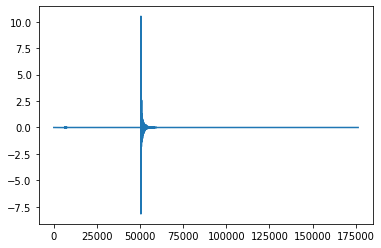

In [294]:
plot_y(y)
play_np_BT(y)

50472


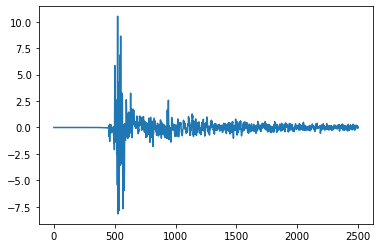

In [297]:
loc = 0
for i, val in enumerate(y):
    if val > 1:
        print(i)
        loc = i
        break
        

plot_y(y[loc-500: loc+2000])

(88200,) (441000,)


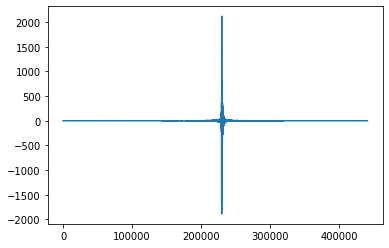

In [284]:
data = np.reshape(y, y.size)

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 7  # Note duration of 3 seconds

sec = 2
t = np.linspace(0, sec, sec * fs)
h = chirp(t, f0=500, f1=1000, t1=sec, method='linear')

h_rev = h[::-1]

print(h_rev.shape, data.shape)

g = np.convolve(data, h_rev, 'same')

plot_y(g)

441000 176400 88200
229912


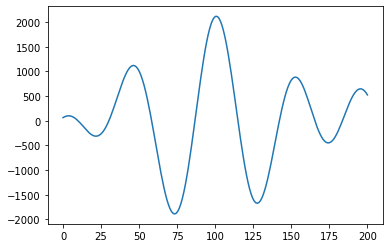

In [303]:
## print(len(g), len(y), len(h_rev))
dg = len(g)
dy = len(y)
dh = len(h_rev)

print(dg, dy, dh)

i_max = np.argmax(g)

rng = 100


k = g[i_max - rng:i_max + rng]

plot_y(k)
print(i_max)

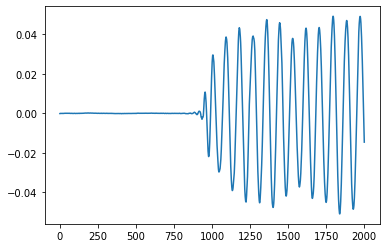

In [286]:
rng2 = 1000
cntr = int(i_max - dh/2)
plot_y(y[cntr - rng2:cntr  + rng2])


[ 0.375       0.70952327 -0.0517767  -0.22067086 -0.375      -0.32422425
 -0.0517767   0.10596988 -0.625       0.24758351  0.3017767  -0.02932914
  0.125      -0.13288253  0.3017767  -0.35596988]
[ 0.+0.j  1.+1.j  1.-1.j  1.-1.j -1.-1.j  1.-1.j -1.-1.j  1.-1.j  0.+0.j
  1.+1.j -1.+1.j  1.+1.j -1.+1.j  1.+1.j  1.+1.j  1.-1.j]


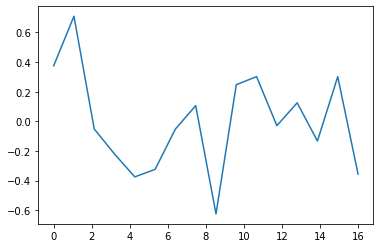

In [227]:
# Combining data into 

freq = np.array([0, 1+1j, 1-1j, 1-1j, -1-1j, 1-1j, -1-1j, 1-1j])
freq2 = freq[:0:-1].conjugate()
freq_combined = np.concatenate((freq, [0],freq2))

time = ifft(freq_combined, n=16).real

print(time)

In [218]:
a = [1,2,3,4,5,6,7,8]
print(a[:0:-1])

[8, 7, 6, 5, 4, 3, 2]
